In [1]:
##import pandas
import pandas as pd
import numpy as np

In [2]:
##read selected file
df = pd.read_csv('Data/Traffic_Collision_Data_from_2019_to_Present.csv') 

In [3]:
##conduct data exploration 
df.shape

(90784, 18)

In [4]:
df.head(3)

DR Number Date Reported Date Occurred  Time Occurred  Area ID Area Name  \
0  200704291    01/07/2020    01/01/2019           1033        7  Wilshire   
1  191304041    01/01/2019    01/01/2019            200       13    Newton   
2  191418727    08/25/2019    01/01/2019           2250       14   Pacific   

   Reporting District  Crime Code Crime Code Description  \
0                 793         997      TRAFFIC COLLISION   
1                1383         997      TRAFFIC COLLISION   
2                1494         997      TRAFFIC COLLISION   

                                       MO Codes  Victim Age Victim Sex  \
0  3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   
1                 3101 3401 3701 3004 3030 3036        49.0          F   
2  3003 3025 3029 3035 3037 3101 3401 3701 4027        33.0          M   

  Victim Descent  Premise Code Premise Description  \
0              W         101.0              STREET   
1              B         101.0              STREET   
2              W         101.0              STREET   

                           Address Cross Street              Location  
0                         CRENSHAW   WASHINGTON  (34.0399, -118.3311)  
1  59TH                         ST     BROADWAY  (33.9869, -118.2783)  
2                        VICKSBURG      CENTURY   (33.942, -118.4095)

In [5]:
##verify if there are any empty columns
df.columns[df.isna().all()].tolist()

[]

In [6]:
###there are no empty columns. note which columns I want to drop
columns_to_drop =['DR Number', 'Date Reported', 'Reporting District', 'Crime Code', 'Crime Code Description', 'Premise Code', 'Premise Description']

In [7]:
##redefine df to exclude these dropped columns
df = df.drop(columns_to_drop,axis=1)

In [8]:
##check that these columns have been dropped from df
df.head()

Date Occurred  Time Occurred  Area ID Area Name  \
0    01/01/2019           1033        7  Wilshire   
1    01/01/2019            200       13    Newton   
2    01/01/2019           2250       14   Pacific   
3    01/01/2019           2130        8   West LA   
4    01/01/2019            240       16  Foothill   

                                       MO Codes  Victim Age Victim Sex  \
0  3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   
1                 3101 3401 3701 3004 3030 3036        49.0          F   
2  3003 3025 3029 3035 3037 3101 3401 3701 4027        33.0          M   
3       3004 3025 3035 3036 3101 3401 3701 4027        52.0          M   
4       3037 3039 3006 3028 3101 3401 3701 4026        50.0          M   

  Victim Descent                          Address  \
0              W                         CRENSHAW   
1              B  59TH                         ST   
2              W                        VICKSBURG   
3              H  OVERLAND                     AV   
4              H  FAIR                         AV   

                      Cross Street              Location  
0                       WASHINGTON  (34.0399, -118.3311)  
1                         BROADWAY  (33.9869, -118.2783)  
2                          CENTURY   (33.942, -118.4095)  
3  NATIONAL                     BL  (34.0325, -118.4176)  
4  ARMINTA                      ST  (34.2135, -118.3747)

In [9]:
##check information type of columns
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90784 entries, 0 to 90783
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date Occurred   90784 non-null  object 
 1   Time Occurred   90784 non-null  int64  
 2   Area ID         90784 non-null  int64  
 3   Area Name       90784 non-null  object 
 4   MO Codes        86656 non-null  object 
 5   Victim Age      83848 non-null  float64
 6   Victim Sex      88634 non-null  object 
 7   Victim Descent  88376 non-null  object 
 8   Address         90784 non-null  object 
 9   Cross Street    84741 non-null  object 
 10  Location        90784 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 7.6+ MB


In [10]:
##make "Date Occurred" type as datetime64
df['Date Occurred'] = pd.to_datetime(df['Date Occurred'])  

In [11]:
##verify that "Date Occurred" and "Location" updated correctly
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90784 entries, 0 to 90783
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date Occurred   90784 non-null  datetime64[ns]
 1   Time Occurred   90784 non-null  int64         
 2   Area ID         90784 non-null  int64         
 3   Area Name       90784 non-null  object        
 4   MO Codes        86656 non-null  object        
 5   Victim Age      83848 non-null  float64       
 6   Victim Sex      88634 non-null  object        
 7   Victim Descent  88376 non-null  object        
 8   Address         90784 non-null  object        
 9   Cross Street    84741 non-null  object        
 10  Location        90784 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [12]:
##I want to have the coordinates in separate columns because I'm running into issues later since they're all in in column.
df.Location.str.extract(
    '\s*\((?P<Latitude>[^,]*),\s*(?P<Longitude>\S*)\).*$',
    expand=True
)

Latitude  Longitude
0      34.0399  -118.3311
1      33.9869  -118.2783
2       33.942  -118.4095
3      34.0325  -118.4176
4      34.2135  -118.3747
...        ...        ...
90779  34.2674  -118.4222
90780   33.998  -118.4108
90781  34.1106  -118.1908
90782  34.0453  -118.2483
90783  34.0472   -118.309

[90784 rows x 2 columns]

In [13]:
##redefine df so that these columns are saved and verify that it works.

df = pd.concat((df, df.Location.str.extract(
    '\s*\((?P<Latitude>[^,]*),\s*(?P<Longitude>\S*)\).*$',
    expand=True
)), axis=1)
df.head(1)

Date Occurred  Time Occurred  Area ID Area Name  \
0    2019-01-01           1033        7  Wilshire   

                                       MO Codes  Victim Age Victim Sex  \
0  3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   

  Victim Descent   Address Cross Street              Location Latitude  \
0              W  CRENSHAW   WASHINGTON  (34.0399, -118.3311)  34.0399   

   Longitude  
0  -118.3311

In [14]:
##run a command so that the data only has the timeframe i want. i want through 3/18/2020 
##since LA shelter in place began 3/19/2020
mask = (df['Date Occurred'] >= '01/01/2019') & (df['Date Occurred'] <= '03/18/2020')
df1=df.loc[mask]
print(df.loc[mask])

      Date Occurred  Time Occurred  Area ID    Area Name  \
0        2019-01-01           1033        7     Wilshire   
1        2019-01-01            200       13       Newton   
2        2019-01-01           2250       14      Pacific   
3        2019-01-01           2130        8      West LA   
4        2019-01-01            240       16     Foothill   
...             ...            ...      ...          ...   
68105    2020-03-18             25        3    Southwest   
68106    2020-03-18           1500       12  77th Street   
68107    2020-03-18           1510       18    Southeast   
68108    2020-03-18           1740        3    Southwest   
68109    2020-03-18           1445       10  West Valley   

                                           MO Codes  Victim Age Victim Sex  \
0      3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   
1                     3101 3401 3701 3004 3030 3036        49.0          F   
2      3003 3025 3029 3035 3037 3101 3401 370

In [15]:
##this looks good. now i will sort by date occurred in case it isn't already sorted.
df1.sort_values(by='Date Occurred')

Date Occurred  Time Occurred  Area ID    Area Name  \
0        2019-01-01           1033        7     Wilshire   
92       2019-01-01           1900        7     Wilshire   
91       2019-01-01           1930        7     Wilshire   
90       2019-01-01             50        7     Wilshire   
89       2019-01-01           2120        7     Wilshire   
...             ...            ...      ...          ...   
68052    2020-03-18           1400       15  N Hollywood   
68051    2020-03-18           1120       21      Topanga   
68050    2020-03-18           2245       21      Topanga   
68048    2020-03-18           1120       17   Devonshire   
68109    2020-03-18           1445       10  West Valley   

                                           MO Codes  Victim Age Victim Sex  \
0      3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   
92     3006 3028 3030 3035 3037 3101 3401 3701 4027        36.0          M   
91     3006 3028 3030 3035 3037 3101 3401 3701 4027        30.0          F   
90     3006 3028 3030 3035 3037 3101 3401 3701 4007         NaN          F   
89     3004 3028 3030 3035 3037 3101 3401 3701 4027        38.0          M   
...                                             ...         ...        ...   
68052                 3006 3028 3034 3037 3101 4026        50.0          M   
68051                      3009 3025 3037 3101 4021        22.0          M   
68050                      3006 3026 3037 3101 4021        30.0          F   
68048                 3006 3028 3030 3037 3101 4017        45.0          M   
68109                                           NaN        40.0          F   

      Victim Descent                          Address  \
0                  W                         CRENSHAW   
92                 O  HIGHLAND                     AV   
91                 H  LA BREA                      AV   
90                 O  SAINT ELMO                   DR   
89                 W  OLYMPIC                      BL   
...              ...                              ...   
68052              W  VANOWEN                      ST   
68051              O  ROSCOE                       BL   
68050              X  VANOWEN                      ST   
68048              H  TAMPA                        AV   
68109              W  VANOWEN                      ST   

                          Cross Street              Location Latitude  \
0                           WASHINGTON  (34.0399, -118.3311)  34.0399   
92     3RD                          ST  (34.0783, -118.3392)  34.0783   
91     WASHINGTON                   BL  (34.0404, -118.3475)  34.0404   
90     RIMPAU                       AV  (34.0434, -118.3418)  34.0434   
89     MANSFIELD                    AV  (34.0572, -118.3425)  34.0572   
...                                ...                   ...      ...   
68052  WHITSETT                     AV   (34.194, -118.4052)   34.194   
68051  DE SOTO                      AV    (34.22, -118.5885)    34.22   
68050  OSO                          AV  (34.1938, -118.5753)  34.1938   
68048  NORDHOFF                     WY  (34.2355, -118.5536)  34.2355   
68109  VANALDEN                     AV  (34.1939, -118.5491)  34.1939   

       Longitude  
0      -118.3311  
92     -118.3392  
91     -118.3475  
90     -118.3418  
89     -118.3425  
...          ...  
68052  -118.4052  
68051  -118.5885  
68050  -118.5753  
68048  -118.5536  
68109  -118.5491  

[68110 rows x 13 columns]

In [16]:
##i want to see the column names
columns = list(df1)
columns

['Date Occurred',
 'Time Occurred',
 'Area ID',
 'Area Name',
 'MO Codes',
 'Victim Age',
 'Victim Sex',
 'Victim Descent',
 'Address',
 'Cross Street',
 'Location',
 'Latitude',
 'Longitude']

In [17]:
##rename columns
df1.columns = ['Date_Occurred',
 'Time_Occurred',
 'Area_ID',
 'Area_Name',
 'MO_Codes',
 'Victim_Age',
 'Victim_Sex',
 'Victim_Descent',
 'Address',
 'Cross_Street',
 'Location',
 'Latitude',
 'Longitude']
df1.head(1)

Date_Occurred  Time_Occurred  Area_ID Area_Name  \
0    2019-01-01           1033        7  Wilshire   

                                       MO_Codes  Victim_Age Victim_Sex  \
0  3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   

  Victim_Descent   Address Cross_Street              Location Latitude  \
0              W  CRENSHAW   WASHINGTON  (34.0399, -118.3311)  34.0399   

   Longitude  
0  -118.3311

In [18]:
##edit cell contents so its clearer what ethnicity the victim was, for later
df1.loc[df1.Victim_Descent == 'A', 'Victim_Descent'] = 'Other Asian'
df1.loc[df1.Victim_Descent == 'B', 'Victim_Descent'] = 'Black'
df1.loc[df1.Victim_Descent == 'C', 'Victim_Descent'] = 'Chinese'
df1.loc[df1.Victim_Descent == 'D', 'Victim_Descent'] = 'Cambodian'
df1.loc[df1.Victim_Descent == 'F', 'Victim_Descent'] = 'Filipino'
df1.loc[df1.Victim_Descent == 'G', 'Victim_Descent'] = 'Guamanian'
df1.loc[df1.Victim_Descent == 'H', 'Victim_Descent'] = 'Hispanic, Latin, Mexican'
df1.loc[df1.Victim_Descent == 'I', 'Victim_Descent'] = 'American Indian, Alaskan Native'
df1.loc[df1.Victim_Descent == 'J', 'Victim_Descent'] = 'Japanese'
df1.loc[df1.Victim_Descent == 'K', 'Victim_Descent'] = 'Korean'
df1.loc[df1.Victim_Descent == 'L', 'Victim_Descent'] = 'Laotian'
df1.loc[df1.Victim_Descent == 'O', 'Victim_Descent'] = 'Other'
df1.loc[df1.Victim_Descent == 'P', 'Victim_Descent'] = 'Pacific Islander'
df1.loc[df1.Victim_Descent == 'S', 'Victim_Descent'] = 'Samoan'
df1.loc[df1.Victim_Descent == 'U', 'Victim_Descent'] = 'Hawaiian'
df1.loc[df1.Victim_Descent == 'V', 'Victim_Descent'] = 'Vietnamese'
df1.loc[df1.Victim_Descent == 'W', 'Victim_Descent'] = 'White'
df1.loc[df1.Victim_Descent == 'X', 'Victim_Descent'] = 'Unknown'
df1.loc[df1.Victim_Descent == 'Z', 'Victim_Descent'] = 'Asian Indian'
df1.loc[df1.Victim_Sex == 'F', 'Victim_Sex'] = 'Female'
df1.loc[df1.Victim_Sex == 'M', 'Victim_Sex'] = 'Male'
df1.loc[df1.Victim_Sex == 'X', 'Victim_Sex'] = 'Unidentified'

df1.head(5)

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Date_Occurred  Time_Occurred  Area_ID Area_Name  \
0    2019-01-01           1033        7  Wilshire   
1    2019-01-01            200       13    Newton   
2    2019-01-01           2250       14   Pacific   
3    2019-01-01           2130        8   West LA   
4    2019-01-01            240       16  Foothill   

                                       MO_Codes  Victim_Age Victim_Sex  \
0  3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0       Male   
1                 3101 3401 3701 3004 3030 3036        49.0     Female   
2  3003 3025 3029 3035 3037 3101 3401 3701 4027        33.0       Male   
3       3004 3025 3035 3036 3101 3401 3701 4027        52.0       Male   
4       3037 3039 3006 3028 3101 3401 3701 4026        50.0       Male   

             Victim_Descent                          Address  \
0                     White                         CRENSHAW   
1                     Black  59TH                         ST   
2                     White                        VICKSBURG   
3  Hispanic, Latin, Mexican  OVERLAND                     AV   
4  Hispanic, Latin, Mexican  FAIR                         AV   

                      Cross_Street              Location Latitude  Longitude  
0                       WASHINGTON  (34.0399, -118.3311)  34.0399  -118.3311  
1                         BROADWAY  (33.9869, -118.2783)  33.9869  -118.2783  
2                          CENTURY   (33.942, -118.4095)   33.942  -118.4095  
3  NATIONAL                     BL  (34.0325, -118.4176)  34.0325  -118.4176  
4  ARMINTA                      ST  (34.2135, -118.3747)  34.2135  -118.3747

In [19]:
##i want to clean up data a bit more so I can graph it easier later.
df1['Month'] = pd.DatetimeIndex(df1['Date_Occurred']).month
df1['Year'] = pd.DatetimeIndex(df1['Date_Occurred']).year
df1_grouped = (df1.groupby(['Year', 'Month'])
                .size()
                .reset_index(name="n_traffic_accidents"))
df1_grouped

<ipython-input-19-16baf628c422>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'] = pd.DatetimeIndex(df1['Date_Occurred']).month
<ipython-input-19-16baf628c422>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Year'] = pd.DatetimeIndex(df1['Date_Occurred']).year


Year  Month  n_traffic_accidents
0   2019      1                 4548
1   2019      2                 4420
2   2019      3                 4929
3   2019      4                 4527
4   2019      5                 4667
5   2019      6                 4491
6   2019      7                 4864
7   2019      8                 4950
8   2019      9                 4911
9   2019     10                 5063
10  2019     11                 4593
11  2019     12                 4660
12  2020      1                 4277
13  2020      2                 4568
14  2020      3                 2642

In [20]:
##add a new column of 'month-year' and populate column. i ultimately want a graph of month-year and n_traffic_accidents
df1_grouped['Month-Year'] = 'Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019', 'Jun 2019', 'Jul 2019', 'Aug 2019', 'Sept 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020'
df1_grouped

Year  Month  n_traffic_accidents Month-Year
0   2019      1                 4548   Jan 2019
1   2019      2                 4420   Feb 2019
2   2019      3                 4929   Mar 2019
3   2019      4                 4527   Apr 2019
4   2019      5                 4667   May 2019
5   2019      6                 4491   Jun 2019
6   2019      7                 4864   Jul 2019
7   2019      8                 4950   Aug 2019
8   2019      9                 4911  Sept 2019
9   2019     10                 5063   Oct 2019
10  2019     11                 4593   Nov 2019
11  2019     12                 4660   Dec 2019
12  2020      1                 4277   Jan 2020
13  2020      2                 4568   Feb 2020
14  2020      3                 2642   Mar 2020

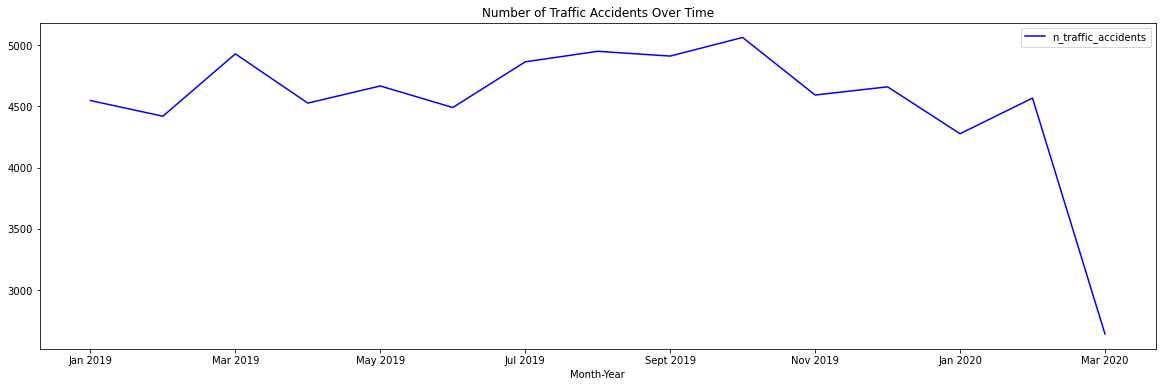

In [21]:
##graph using a line chart so it's easier to see change over time 
df1_grouped.plot(x="Month-Year", y="n_traffic_accidents", color='blue', 
                 title = 'Number of Traffic Accidents Over Time',
                figsize=(20, 6))

In [22]:
##save this data as a CSV. df1 is the pre-covid data. 
df1.to_csv('Pre-Covid19_Data_Trimmed.csv')

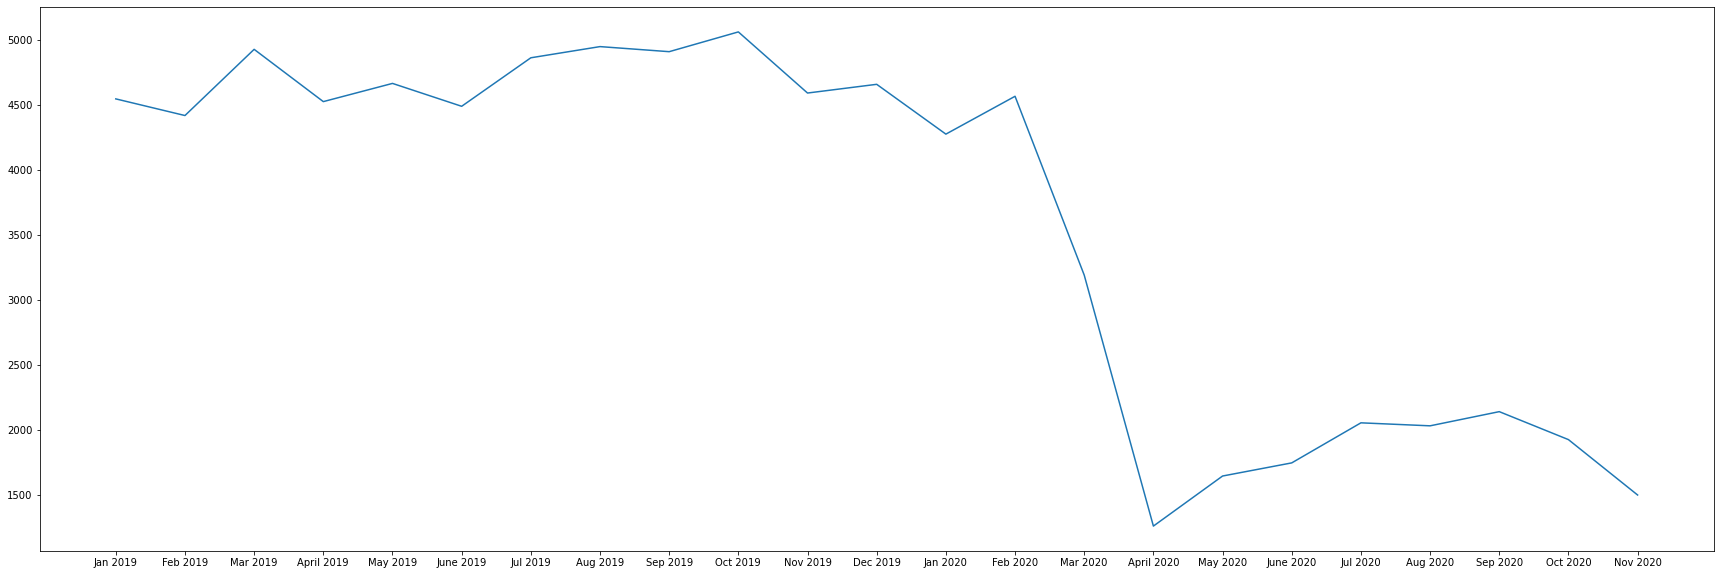

In [23]:
##this is a line graph of pre and during covid that we used on our website
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
plt.plot(['Jan 2019', 'Feb 2019', 'Mar 2019', 'April 2019', 'May 2019', 'June 2019', 'Jul 2019',
         'Aug 2019', 'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019','Jan 2020', 'Feb 2020', 'Mar 2020', 
          'April 2020', 'May 2020', 'June 2020', 'Jul 2020',
         'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020'], [4548, 4420, 4929, 4527, 4667, 4491, 4864, 4950, 4911, 5063,
                                                                      4593, 4660, 4277, 4568, 3193, 1263, 1648,
                                                                      1749, 2057, 2034, 2143, 1928, 1502])

plt.show()

In [24]:
##import geopandas
import geopandas as gpd

In [25]:
##i want to see LA neighborhoods, which will ultimately be used as base map.
neighborhoods = gpd.read_file('http://s3-us-west-2.amazonaws.com/boundaries.latimes.com/archive/1.0/boundary-set/la-county-neighborhoods-v5.geojson')


In [26]:
##remove columns i don't need.
neighborhoods =neighborhoods[['name','geometry']]
neighborhoods.head(1)

name                                           geometry
0  Acton  MULTIPOLYGON (((-118.20262 34.53899, -118.1894...

In [27]:
##make sure EPSG is 4326.
neighborhoods.set_crs(epsg=4326, inplace=True)

name                                           geometry
0              Acton  MULTIPOLYGON (((-118.20262 34.53899, -118.1894...
1    Adams-Normandie  MULTIPOLYGON (((-118.30901 34.03741, -118.3004...
2       Agoura Hills  MULTIPOLYGON (((-118.76193 34.16820, -118.7263...
3         Agua Dulce  MULTIPOLYGON (((-118.25468 34.55830, -118.2555...
4           Alhambra  MULTIPOLYGON (((-118.12175 34.10504, -118.1168...
..               ...                                                ...
267      Willowbrook  MULTIPOLYGON (((-118.23005 33.92809, -118.2280...
268       Wilmington  MULTIPOLYGON (((-118.22476 33.82461, -118.2245...
269   Windsor Square  MULTIPOLYGON (((-118.31371 34.07631, -118.3138...
270         Winnetka  MULTIPOLYGON (((-118.56221 34.23150, -118.5621...
271   Woodland Hills  MULTIPOLYGON (((-118.57569 34.18822, -118.5736...

[272 rows x 2 columns]

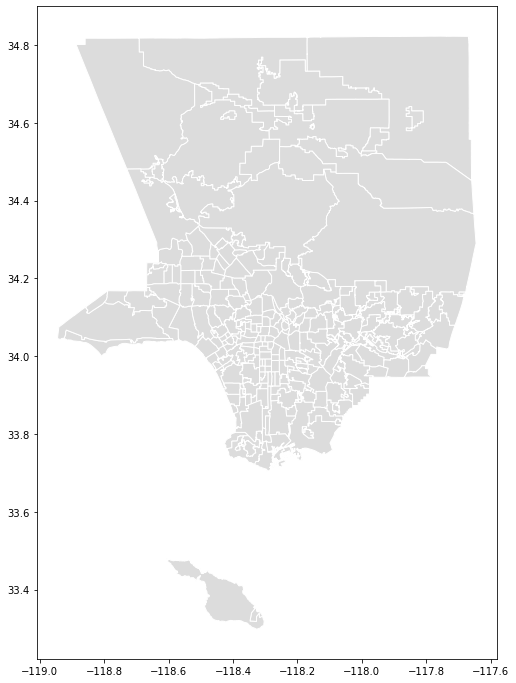

In [28]:
##plot the LA neighborhoods to see what it will look like
ax=neighborhoods.plot(figsize=(12,12),color='gainsboro', edgecolor='white')

In [29]:
import pandas as pd
import plotly.express as px
from sodapy import Socrata
import matplotlib.pyplot as plt

In [30]:
##import my pre-covid 19 data as a CSV
dfx = pd.read_csv('Pre-Covid19_Data_Trimmed.csv') 

In [31]:
##do some data exploration
dfx.shape

(68110, 16)

In [32]:
list(dfx)

['Unnamed: 0',
 'Date_Occurred',
 'Time_Occurred',
 'Area_ID',
 'Area_Name',
 'MO_Codes',
 'Victim_Age',
 'Victim_Sex',
 'Victim_Descent',
 'Address',
 'Cross_Street',
 'Location',
 'Latitude',
 'Longitude',
 'Month',
 'Year']

In [33]:
##make the dataframe into a geodataframe and make sure it is EGPS 4326
traffic = gpd.GeoDataFrame(dfx, geometry=gpd.points_from_xy(dfx.Longitude, dfx.Latitude))
traffic.set_crs(epsg=4326, inplace=True)

Unnamed: 0 Date_Occurred  Time_Occurred  Area_ID    Area_Name  \
0               0    2019-01-01           1033        7     Wilshire   
1               1    2019-01-01            200       13       Newton   
2               2    2019-01-01           2250       14      Pacific   
3               3    2019-01-01           2130        8      West LA   
4               4    2019-01-01            240       16     Foothill   
...           ...           ...            ...      ...          ...   
68105       68105    2020-03-18             25        3    Southwest   
68106       68106    2020-03-18           1500       12  77th Street   
68107       68107    2020-03-18           1510       18    Southeast   
68108       68108    2020-03-18           1740        3    Southwest   
68109       68109    2020-03-18           1445       10  West Valley   

                                           MO_Codes  Victim_Age Victim_Sex  \
0      3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0       Male   
1                     3101 3401 3701 3004 3030 3036        49.0     Female   
2      3003 3025 3029 3035 3037 3101 3401 3701 4027        33.0       Male   
3           3004 3025 3035 3036 3101 3401 3701 4027        52.0       Male   
4           3037 3039 3006 3028 3101 3401 3701 4026        50.0       Male   
...                                             ...         ...        ...   
68105                                           NaN        45.0     Female   
68106                 4012 3037 3004 3026 3029 3101        40.0       Male   
68107                 4025 3037 3004 3028 3030 3101        23.0       Male   
68108                                           NaN        38.0     Female   
68109                                           NaN        40.0     Female   

                 Victim_Descent                             Address  \
0                         White                            CRENSHAW   
1                         Black     59TH                         ST   
2                         White                           VICKSBURG   
3      Hispanic, Latin, Mexican     OVERLAND                     AV   
4      Hispanic, Latin, Mexican     FAIR                         AV   
...                         ...                                 ...   
68105  Hispanic, Latin, Mexican     WESTERN                      AV   
68106                     Black  S  WESTERN                      AV   
68107  Hispanic, Latin, Mexican     MONA                         BL   
68108  Hispanic, Latin, Mexican  W  VERNON                       AV   
68109                     White     VANOWEN                      ST   

                          Cross_Street              Location  Latitude  \
0                           WASHINGTON  (34.0399, -118.3311)   34.0399   
1                             BROADWAY  (33.9869, -118.2783)   33.9869   
2                              CENTURY   (33.942, -118.4095)   33.9420   
3      NATIONAL                     BL  (34.0325, -118.4176)   34.0325   
4      ARMINTA                      ST  (34.2135, -118.3747)   34.2135   
...                                ...                   ...       ...   
68105  42ND                         PL  (34.0061, -118.3089)   34.0061   
68106  81ST                         ST   (33.9655, -118.309)   33.9655   
68107  112TH                        ST   (33.939, -118.2314)   33.9390   
68108  DENKER                       AV  (34.0037, -118.3045)   34.0037   
68109  VANALDEN                     AV  (34.1939, -118.5491)   34.1939   

       Longitude  Month  Year                     geometry  
0      -118.3311      1  2019  POINT (-118.33110 34.03990)  
1      -118.2783      1  2019  POINT (-118.27830 33.98690)  
2      -118.4095      1  2019  POINT (-118.40950 33.94200)  
3      -118.4176      1  2019  POINT (-118.41760 34.03250)  
4      -118.3747      1  2019  POINT (-118.37470 34.21350)  
...          ...    ...   ...                          ...  
68105  -118.3089      3  2020  POINT

In [34]:
traffic.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 68110 entries, 0 to 68109
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      68110 non-null  int64   
 1   Date_Occurred   68110 non-null  object  
 2   Time_Occurred   68110 non-null  int64   
 3   Area_ID         68110 non-null  int64   
 4   Area_Name       68110 non-null  object  
 5   MO_Codes        66068 non-null  object  
 6   Victim_Age      62732 non-null  float64 
 7   Victim_Sex      66431 non-null  object  
 8   Victim_Descent  66185 non-null  object  
 9   Address         68110 non-null  object  
 10  Cross_Street    63952 non-null  object  
 11  Location        68110 non-null  object  
 12  Latitude        68110 non-null  float64 
 13  Longitude       68110 non-null  float64 
 14  Month           68110 non-null  int64   
 15  Year            68110 non-null  int64   
 16  geometry        68110 non-null  geometry
dtypes: f

In [35]:
##there are some coordinates that are 0,0 which are causing me issues. i will filter these out.
traffic1= (traffic[traffic["Latitude"] >= 33])
traffic1.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 68104 entries, 0 to 68109
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      68104 non-null  int64   
 1   Date_Occurred   68104 non-null  object  
 2   Time_Occurred   68104 non-null  int64   
 3   Area_ID         68104 non-null  int64   
 4   Area_Name       68104 non-null  object  
 5   MO_Codes        66062 non-null  object  
 6   Victim_Age      62727 non-null  float64 
 7   Victim_Sex      66425 non-null  object  
 8   Victim_Descent  66179 non-null  object  
 9   Address         68104 non-null  object  
 10  Cross_Street    63946 non-null  object  
 11  Location        68104 non-null  object  
 12  Latitude        68104 non-null  float64 
 13  Longitude       68104 non-null  float64 
 14  Month           68104 non-null  int64   
 15  Year            68104 non-null  int64   
 16  geometry        68104 non-null  geometry
dtypes: f

In [36]:
##confirm that i was able to drop the 0,0 coordinates from the original dataset
traffic1.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 68104 entries, 0 to 68109
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Unnamed: 0      68104 non-null  int64   
 1   Date_Occurred   68104 non-null  object  
 2   Time_Occurred   68104 non-null  int64   
 3   Area_ID         68104 non-null  int64   
 4   Area_Name       68104 non-null  object  
 5   MO_Codes        66062 non-null  object  
 6   Victim_Age      62727 non-null  float64 
 7   Victim_Sex      66425 non-null  object  
 8   Victim_Descent  66179 non-null  object  
 9   Address         68104 non-null  object  
 10  Cross_Street    63946 non-null  object  
 11  Location        68104 non-null  object  
 12  Latitude        68104 non-null  float64 
 13  Longitude       68104 non-null  float64 
 14  Month           68104 non-null  int64   
 15  Year            68104 non-null  int64   
 16  geometry        68104 non-null  geometry
dtypes: f

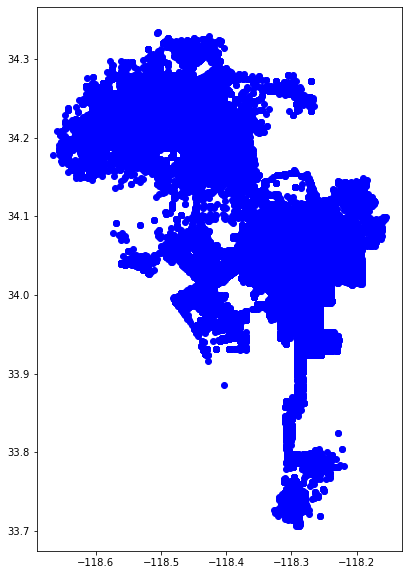

In [37]:
##plot the traffic collisions
traffic1.plot(figsize=(30,10), color='blue')

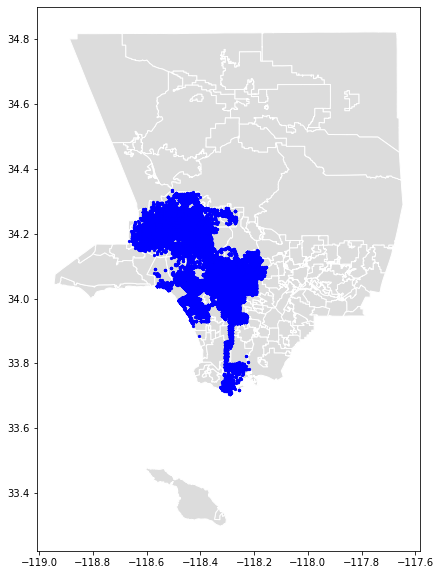

In [38]:
##now i will try to overlay the two datasets

##neighborhooods layer will be my "base"
base = neighborhoods.plot(figsize=(30,10),color='gainsboro', edgecolor='white')

##the layer that will go on top will be traffic collision points
ax = traffic1.plot(ax = base, color='blue', markersize=5)

In [39]:
##check total bounds so i can make the map more zoomed in
traffic1.geometry.total_bounds

array([-118.6652,   33.7065, -118.1554,   34.3343])

In [40]:
minx, miny, maxx, maxy = traffic1.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-118.6652
-118.1554
33.7065
34.3343


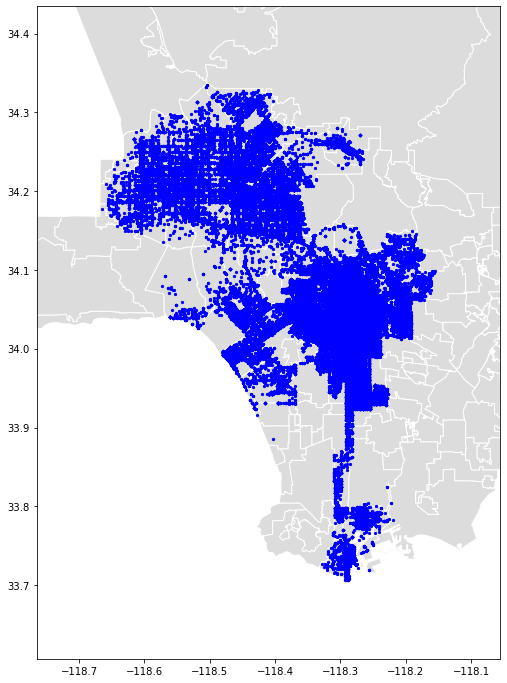

In [41]:
##use the bounding box coordinates to set the x and y limits
base = neighborhoods.plot(figsize=(12,12),color='gainsboro', edgecolor='white')
ax = traffic1.plot(ax=base, marker='o', color='blue', markersize=5)
ax.set_xlim(minx - .1, maxx + .1) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - .1, maxy + .1)
ax

In [42]:
##join the data
join = gpd.sjoin(neighborhoods,
                 traffic1,
                 how='right')

In [43]:
join.head()

index_left             name  Unnamed: 0 Date_Occurred  Time_Occurred  \
42626         1.0  Adams-Normandie       42626    2019-10-02            800   
42626       232.0  University Park       42626    2019-10-02            800   
47111         1.0  Adams-Normandie       47111    2019-10-30           1620   
47111       232.0  University Park       47111    2019-10-30           1620   
23161         1.0  Adams-Normandie       23161    2019-06-01           1800   

       Area_ID  Area_Name                       MO_Codes  Victim_Age  \
42626        3  Southwest                            NaN        33.0   
42626        3  Southwest                            NaN        33.0   
47111        3  Southwest       3036 3004 3028 3039 3101        52.0   
47111        3  Southwest       3036 3004 3028 3039 3101        52.0   
23161        3  Southwest  3037 4003 3004 3028 3030 3101        18.0   

         Victim_Sex Victim_Descent                             Address  \
42626          Male          White  W  ADAMS                        BL   
42626          Male          White  W  ADAMS                        BL   
47111        Female          Black     VERMONT                      AV   
47111        Female          Black     VERMONT                      AV   
23161  Unidentified        Unknown     ADAMS                        BL   

                             Cross_Street              Location  Latitude  \
42626  S  VERMONT                      AV  (34.0328, -118.2915)   34.0328   
42626  S  VERMONT                      AV  (34.0328, -118.2915)   34.0328   
47111     ADAMS                        BL  (34.0328, -118.2915)   34.0328   
47111     ADAMS                        BL  (34.0328, -118.2915)   34.0328   
23161     VERMONT                      AV  (34.0328, -118.2915)   34.0328   

       Longitude  Month  Year                     geometry  
42626  -118.2915     10  2019  POINT (-118.29150 34.03280)  
42626  -118.2915     10  2019  POINT (-118.29150 34.03280)  
47111  -118.2915     10  2019  POINT (-118.29150 34.03280)  
47111  -118.2915     10  2019  POINT (-118.29150 34.03280)  
23161  -118.2915      6  2019  POINT (-118.29150 34.03280)

In [44]:
##redefine the new joined dataset
traffic_collisions_by_neighborhoods = join.name.value_counts().rename_axis('name').reset_index(name='traffic_collision_count')

In [45]:
traffic_collisions_by_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   name                     149 non-null    object
 1   traffic_collision_count  149 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [46]:
##add in a new column of average traffic collisions per day
traffic_collisions_by_neighborhoods['avg_traffic_collisions_per_day'] = traffic_collisions_by_neighborhoods['traffic_collision_count']/442 
traffic_collisions_by_neighborhoods.head()

name  traffic_collision_count  avg_traffic_collisions_per_day
0   Downtown                     3455                        7.816742
1   Van Nuys                     2212                        5.004525
2  Hollywood                     2048                        4.633484
3  Koreatown                     1804                        4.081448
4   Westlake                     1660                        3.755656

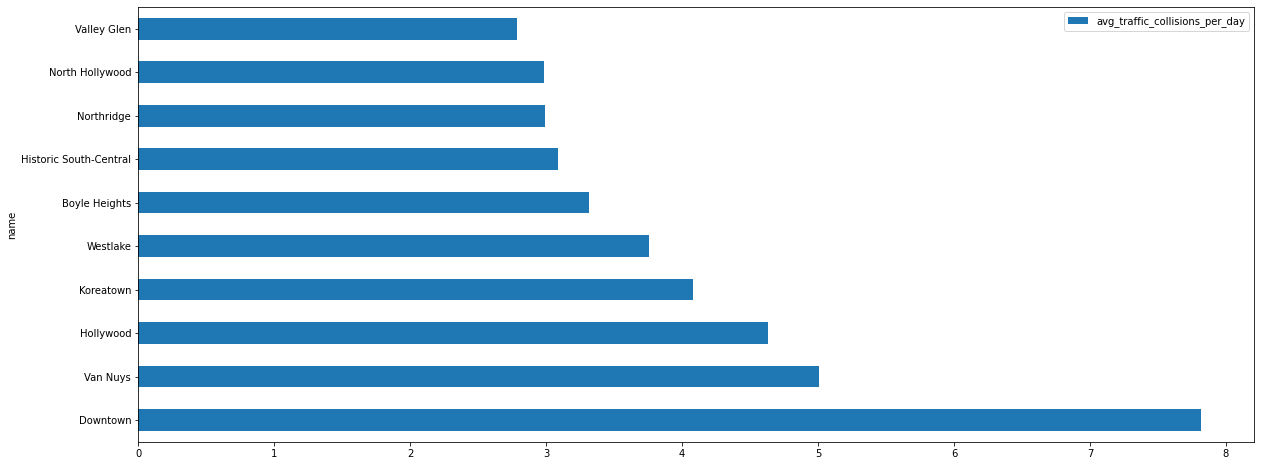

In [47]:
##do a bar chart to see the top 10 neighborhoods with the highest traffic collision rates
traffic_collisions_by_neighborhoods[:10].plot.barh(figsize=(20,8),x='name',y='avg_traffic_collisions_per_day')

In [48]:
##join the summary table back to the neighborhood geodatabase
neighborhoods=neighborhoods.merge(traffic_collisions_by_neighborhoods,on='name')

In [49]:
## now neighborhood table now has a count column
neighborhoods.head()

name                                           geometry  \
0    Adams-Normandie  MULTIPOLYGON (((-118.30901 34.03741, -118.3004...   
1           Alhambra  MULTIPOLYGON (((-118.12175 34.10504, -118.1168...   
2             Arleta  MULTIPOLYGON (((-118.42202 34.22410, -118.4228...   
3  Arlington Heights  MULTIPOLYGON (((-118.31591 34.05261, -118.3134...   
4             Athens  MULTIPOLYGON (((-118.29166 33.93096, -118.2915...   

   traffic_collision_count  avg_traffic_collisions_per_day  
0                      294                        0.665158  
1                        1                        0.002262  
2                      293                        0.662896  
3                      406                        0.918552  
4                        9                        0.020362

In [50]:
neighborhoods.to_csv('Pre-Covid19_Data_Avg_Traffic_Collisions_Per_Day.csv')

In [51]:
import contextily as ctx

In [52]:
neighborhoods = neighborhoods.to_crs(epsg=3857)


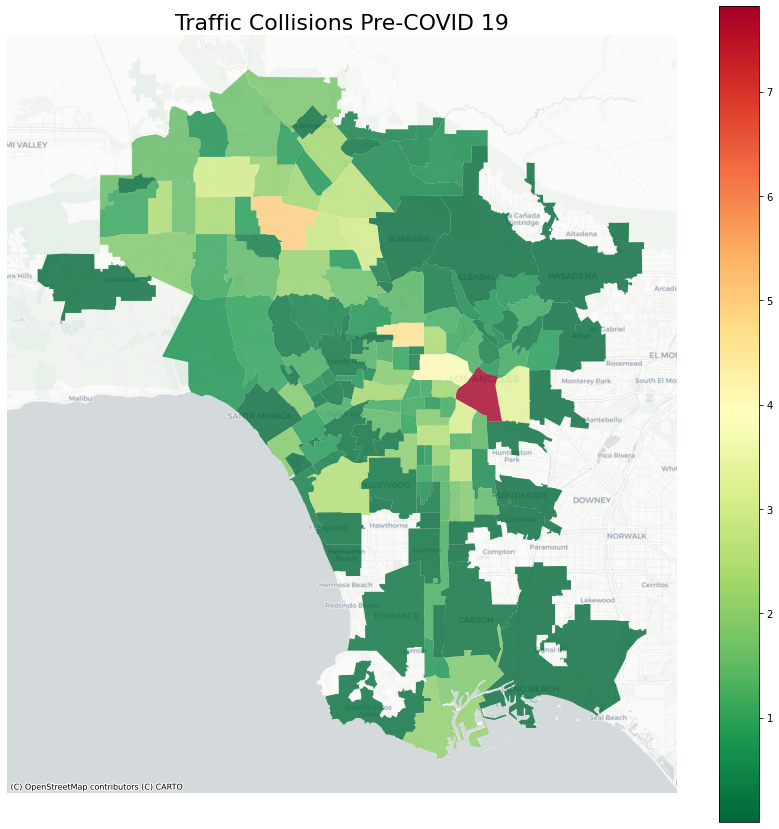

In [53]:
ax = neighborhoods.plot(figsize=(15,15),
                        column='avg_traffic_collisions_per_day',
                        legend=True,
                        alpha=0.8,
                        cmap='RdYlGn_r')

ax.axis('off')
ax.set_title('Traffic Collisions Pre-COVID 19',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [54]:
import plotly.express as px

In [55]:
##reproject to web mercator
neighborhoods = neighborhoods.to_crs(epsg=4326)

In [56]:
neighborhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [57]:
##check the total bounds of the dataset
minx, miny, maxx, maxy = neighborhoods.geometry.total_bounds

In [58]:
center_lat=(maxy-miny)/2+miny
center_lat

34.020922350091055

In [59]:
center_lon=(maxx-minx)/2+minx
center_lon

-118.40011100000015

In [60]:
##this is an interactive map showing the average traffic collisions per day
map = px.choropleth_mapbox(neighborhoods, 
                           geojson=neighborhoods.geometry, 
                           locations=neighborhoods.index, 
                           color='avg_traffic_collisions_per_day',
                           color_continuous_scale="rdylgn_r",
                           mapbox_style="carto-positron",
                           zoom=9, 
                           center = {"lat": center_lat, "lon": center_lon},
                           hover_name=neighborhoods.name,
                           opacity=0.5,
                           range_color=(0, 4),
                          )
map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
map.show()

In [61]:
map.write_html("traffic_rates1_Pre-COVID.html")

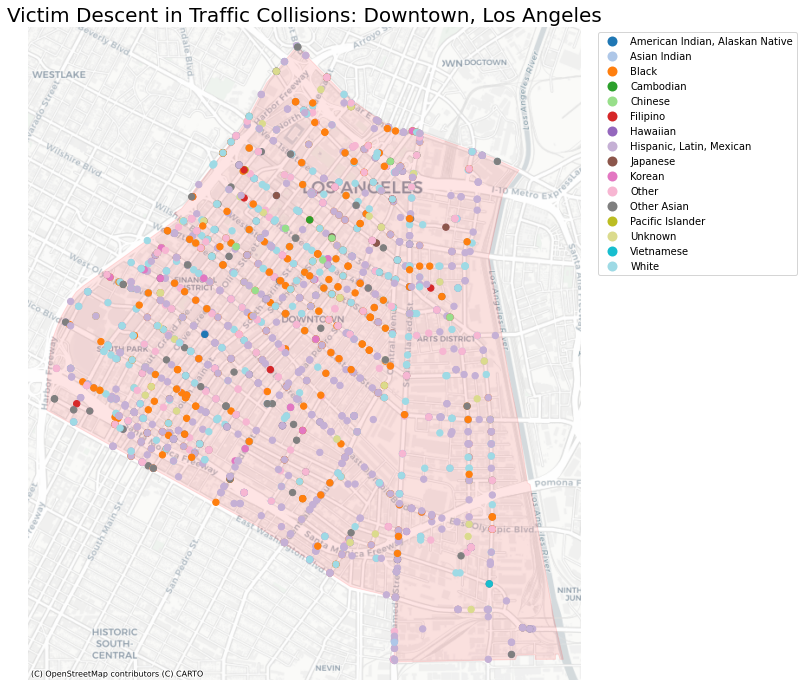

In [62]:
##start function process. need to make sure traffic1 and neighborhoods are both 3857 since that's what contextily uses.
traffic1 =traffic.to_crs(epsg=3857)
neighborhoods = neighborhoods.to_crs(epsg=3857)
    
# subset the neighborhoods geodataframe for a single neighborhood
neighborhood = neighborhoods[neighborhoods.name=='Downtown']

#set x and y limits
minx, miny, maxx, maxy = neighborhood.geometry.total_bounds

##join neighborhoods and traffic1 info
collisions_in_neighborhood = gpd.sjoin(traffic1,neighborhood,how='inner')

#neighborhood is base layer
base = neighborhood.plot(figsize=(12,12),
                         color='red', 
                         edgecolor='red',
                         alpha=0.1)

#add collision data and call for "victim sex"
ax = collisions_in_neighborhood.plot(ax=base, 
                                column='Victim_Descent', 
                                markersize=40, 
                                legend=True,
                                cmap='tab20',
                                legend_kwds={
                                   'loc': 'upper right',
                                   'bbox_to_anchor':(1.4,1)
                                }                  # this puts the legend to the side
                            )

# set the map extent to the extent of the neighborhood bounds
ax.set_xlim(minx - 200, maxx + 200) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 200, maxy + 200)

# turn off the axis
ax.axis('off')

# add a title
ax.set_title('Victim Descent in Traffic Collisions: '+neighborhood.name.values[0]+', Los Angeles',fontsize=20)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
ax

In [63]:
def map_collision_descent_by_neighborhood(place='Downtown'):
    # subset the neighborhoods geodataframe for a single neighborhood
    neighborhood = neighborhoods[neighborhoods.name==place]

    #set x and y limits
    minx, miny, maxx, maxy = neighborhood.geometry.total_bounds

    ##join neighborhoods and traffic1 info
    collisions_in_neighborhood = gpd.sjoin(traffic1,neighborhood,how='inner')

    #neighborhood is base layer
    base = neighborhood.plot(figsize=(12,12),
                             color='red', 
                             edgecolor='red',
                             alpha=0.1)

    #add collision data and call for "victim sex"
    ax = collisions_in_neighborhood.plot(ax=base, 
                                    column='Victim_Descent', 
                                    markersize=40, 
                                    legend=True,
                                    cmap='tab20',
                                    legend_kwds={
                                       'loc': 'upper right',
                                       'bbox_to_anchor':(1.4,1)
                                    }                  # this puts the legend to the side
                                )

    # set the map extent to the extent of the neighborhood bounds
    ax.set_xlim(minx - 200, maxx + 200) # added/substracted value is to give some margin around total bounds
    ax.set_ylim(miny - 200, maxy + 200)

    # turn off the axis
    ax.axis('off')

    # add a title
    ax.set_title('Victim Descent in Traffic Collisions: '+neighborhood.name.values[0]+', Los Angeles',fontsize=20)
    
    # add a basemap
    ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
    ax

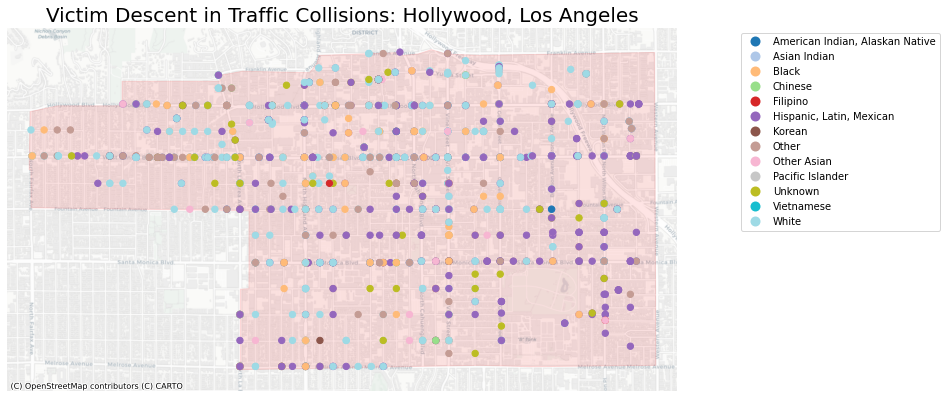

In [64]:
map_collision_descent_by_neighborhood(place='Hollywood')

In [65]:
##tried to see if there was a way we could save this onto our storymaps but looks like no.

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

##i want to create an interactive map with two drop-downs: race and area
top_25_race = df1.Victim_Descent.value_counts().head(25).index.tolist()

@interact

##function argument will become interactive
def traffic_collisions_by(race=top_25_race,
                         area = df1.Area_Name.unique().tolist()):
    
    ##table
    display(df1[(df1.Victim_Descent == race)&(df1.Area_Name == area)].head()) 

    ##map
    ax = df1[(df1.Victim_Descent == race)&(df1.Area_Name == area)].plot(figsize=(9,9), markersize=10)
    
    ##axis
    ax.axis('off')

    ##include a basemap
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter)

interactive(children=(Dropdown(description='race', options=('Hispanic, Latin, Mexican', 'White', 'Black', 'Oth…

In [66]:
##this csv is pre-covid data with MO_Codes contents that contain the MO codes that we determined we wanted to look at, only.
mo = pd.read_csv('Data/TrafficData_MO_Codes_PreCOVID.csv') 

In [67]:
mo.shape

(60400, 18)

In [68]:
mo.head(3)

DR Number Date Reported Date Occurred  Time Occurred  Area ID Area Name  \
0  200704291    01/07/2020    01/01/2019           1033        7  Wilshire   
1  191304041    01/01/2019    01/01/2019            200       13    Newton   
2  191418727    08/25/2019    01/01/2019           2250       14   Pacific   

   Reporting District  Crime Code Crime Code Description  \
0                 793         997      TRAFFIC COLLISION   
1                1383         997      TRAFFIC COLLISION   
2                1494         997      TRAFFIC COLLISION   

                                       MO Codes  Victim Age Victim Sex  \
0  3004 3028 3030 3037 3101 3401 3701 4027 3035        23.0          M   
1                 3101 3401 3701 3004 3030 3036        49.0          F   
2  3003 3025 3029 3035 3037 3101 3401 3701 4027        33.0          M   

  Victim Descent  Premise Code Premise Description  \
0              W         101.0              STREET   
1              B         101.0              STREET   
2              W         101.0              STREET   

                           Address Cross Street              Location  
0                         CRENSHAW   WASHINGTON  (34.0399, -118.3311)  
1  59TH                         ST     BROADWAY  (33.9869, -118.2783)  
2                        VICKSBURG      CENTURY   (33.942, -118.4095)

In [69]:
###there are no empty columns. note which columns I want to drop

mo_columns_to_drop =['DR Number', 'Time Occurred', 'Area ID', 'Address', 'Cross Street', 'Date Reported', 'Reporting District', 'Crime Code', 'Crime Code Description', 'Premise Code', 'Premise Description']

mo= mo.drop(mo_columns_to_drop,axis=1)

mo.head()


Date Occurred Area Name                                      MO Codes  \
0    01/01/2019  Wilshire  3004 3028 3030 3037 3101 3401 3701 4027 3035   
1    01/01/2019    Newton                 3101 3401 3701 3004 3030 3036   
2    01/01/2019   Pacific  3003 3025 3029 3035 3037 3101 3401 3701 4027   
3    01/01/2019   West LA       3004 3025 3035 3036 3101 3401 3701 4027   
4    01/01/2019  Foothill       3037 3039 3006 3028 3101 3401 3701 4026   

   Victim Age Victim Sex Victim Descent              Location  
0        23.0          M              W  (34.0399, -118.3311)  
1        49.0          F              B  (33.9869, -118.2783)  
2        33.0          M              W   (33.942, -118.4095)  
3        52.0          M              H  (34.0325, -118.4176)  
4        50.0          M              H  (34.2135, -118.3747)

In [70]:
##rename columns
mo.columns = ['Date_Occurred',
 'Area_Name',
 'MO_Codes',
 'Victim_Age',
 'Victim_Sex',
 'Victim_Descent',
 'Location']
mo.head(1)

Date_Occurred Area_Name                                      MO_Codes  \
0    01/01/2019  Wilshire  3004 3028 3030 3037 3101 3401 3701 4027 3035   

   Victim_Age Victim_Sex Victim_Descent              Location  
0        23.0          M              W  (34.0399, -118.3311)

In [71]:
##update the location so that there are separate lat and long columns
mo.Location.str.extract(
    '\s*\((?P<Latitude>[^,]*),\s*(?P<Longitude>\S*)\).*$',
    expand=True
)

mo = pd.concat((mo, mo.Location.str.extract(
    '\s*\((?P<Latitude>[^,]*),\s*(?P<Longitude>\S*)\).*$',
    expand=True
)), axis=1)
mo.head(3)

Date_Occurred Area_Name                                      MO_Codes  \
0    01/01/2019  Wilshire  3004 3028 3030 3037 3101 3401 3701 4027 3035   
1    01/01/2019    Newton                 3101 3401 3701 3004 3030 3036   
2    01/01/2019   Pacific  3003 3025 3029 3035 3037 3101 3401 3701 4027   

   Victim_Age Victim_Sex Victim_Descent              Location Latitude  \
0        23.0          M              W  (34.0399, -118.3311)  34.0399   
1        49.0          F              B  (33.9869, -118.2783)  33.9869   
2        33.0          M              W   (33.942, -118.4095)   33.942   

   Longitude  
0  -118.3311  
1  -118.2783  
2  -118.4095

In [72]:
## trying to replace the space with comma in the MO_Codes column using str.format() 
mo.MO_Codes = [x.replace(" ", ", ") for x in mo.MO_Codes]

In [73]:
##it worked, this looks better
mo.MO_Codes

0        3004, 3028, 3030, 3037, 3101, 3401, 3701, 4027...
1                       3101, 3401, 3701, 3004, 3030, 3036
2        3003, 3025, 3029, 3035, 3037, 3101, 3401, 3701...
3           3004, 3025, 3035, 3036, 3101, 3401, 3701, 4027
4           3037, 3039, 3006, 3028, 3101, 3401, 3701, 4026
                               ...                        
60395                         4003, 3036, 3008, 3024, 3101
60396                         4003, 3036, 3004, 3011, 3028
60397                               4003, 3001, 3028, 3030
60398                   4012, 3037, 3004, 3026, 3029, 3101
60399                   4025, 3037, 3004, 3028, 3030, 3101
Name: MO_Codes, Length: 60400, dtype: object

In [74]:
mo.head(3)

Date_Occurred Area_Name                                           MO_Codes  \
0    01/01/2019  Wilshire  3004, 3028, 3030, 3037, 3101, 3401, 3701, 4027...   
1    01/01/2019    Newton                 3101, 3401, 3701, 3004, 3030, 3036   
2    01/01/2019   Pacific  3003, 3025, 3029, 3035, 3037, 3101, 3401, 3701...   

   Victim_Age Victim_Sex Victim_Descent              Location Latitude  \
0        23.0          M              W  (34.0399, -118.3311)  34.0399   
1        49.0          F              B  (33.9869, -118.2783)  33.9869   
2        33.0          M              W   (33.942, -118.4095)   33.942   

   Longitude  
0  -118.3311  
1  -118.2783  
2  -118.4095

In [75]:
##now i am trying to add quotes so that this will be classified as a list, instead of a string.
##this code adds quotes to the beginning and end of each cell
mo['MO_Codes_with_quotes'] = mo['MO_Codes'].apply(lambda x: '"' + str(x) + '"')
print(mo.MO_Codes_with_quotes)

0        "3004, 3028, 3030, 3037, 3101, 3401, 3701, 402...
1                     "3101, 3401, 3701, 3004, 3030, 3036"
2        "3003, 3025, 3029, 3035, 3037, 3101, 3401, 370...
3         "3004, 3025, 3035, 3036, 3101, 3401, 3701, 4027"
4         "3037, 3039, 3006, 3028, 3101, 3401, 3701, 4026"
                               ...                        
60395                       "4003, 3036, 3008, 3024, 3101"
60396                       "4003, 3036, 3004, 3011, 3028"
60397                             "4003, 3001, 3028, 3030"
60398                 "4012, 3037, 3004, 3026, 3029, 3101"
60399                 "4025, 3037, 3004, 3028, 3030, 3101"
Name: MO_Codes_with_quotes, Length: 60400, dtype: object


In [76]:
##this code will add quotations within each MO code
def clean_alt_list(list_):
    list_ = list_.replace(', ', '","')
    list_ = list_.replace('[', '["')
    list_ = list_.replace(']', '"]')
    return list_

In [77]:
mo['MO_Codes_with_quotes'] = mo['MO_Codes_with_quotes'].apply(clean_alt_list)

In [78]:
##verify that it worked - it did.
print(mo.MO_Codes_with_quotes)

0        "3004","3028","3030","3037","3101","3401","370...
1                "3101","3401","3701","3004","3030","3036"
2        "3003","3025","3029","3035","3037","3101","340...
3        "3004","3025","3035","3036","3101","3401","370...
4        "3037","3039","3006","3028","3101","3401","370...
                               ...                        
60395                   "4003","3036","3008","3024","3101"
60396                   "4003","3036","3004","3011","3028"
60397                          "4003","3001","3028","3030"
60398            "4012","3037","3004","3026","3029","3101"
60399            "4025","3037","3004","3028","3030","3101"
Name: MO_Codes_with_quotes, Length: 60400, dtype: object


In [79]:
##i made a new csv file with just the MOs I needed in an attempt to see if this would work better than before
##but there was no difference.
##this is my statistical analysis
mo_clean_quotes = pd.read_csv('MO_Quotes_Clean.csv')  

In [80]:
mo_clean_quotes['MO_Codes_with_quotes'] = mo_clean_quotes.MO_Codes_with_quotes.apply(lambda x: x[1:-1].split(','))
mo_clean_quotes.MO_Codes_with_quotes[0]

["'3004'",
 " '3028'",
 " '3030'",
 " '3037'",
 " '3101'",
 " '3401'",
 " '3701'",
 " '4027'",
 " '3035'"]

In [81]:
##confirm that the MO codes are now a list. I had issues with this where it was noted as string or tupple, before.
for i, l in enumerate(mo_clean_quotes["MO_Codes_with_quotes"]):
 print('list',i,'is',type(l))

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>
list 5 is <class 'list'>
list 6 is <class 'list'>
list 7 is <class 'list'>
list 8 is <class 'list'>
list 9 is <class 'list'>
list 10 is <class 'list'>
list 11 is <class 'list'>
list 12 is <class 'list'>
list 13 is <class 'list'>
list 14 is <class 'list'>
list 15 is <class 'list'>
list 16 is <class 'list'>
list 17 is <class 'list'>
list 18 is <class 'list'>
list 19 is <class 'list'>
list 20 is <class 'list'>
list 21 is <class 'list'>
list 22 is <class 'list'>
list 23 is <class 'list'>
list 24 is <class 'list'>
list 25 is <class 'list'>
list 26 is <class 'list'>
list 27 is <class 'list'>
list 28 is <class 'list'>
list 29 is <class 'list'>
list 30 is <class 'list'>
list 31 is <class 'list'>
list 32 is <class 'list'>
list 33 is <class 'list'>
list 34 is <class 'list'>
list 35 is <class 'list'>
list 36 is <class 'list'>
list 37 is <class 'list'>
list 38 is <class 'lis

In [82]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [83]:
##check value counts of different MO codes
to_1D(mo_clean_quotes["MO_Codes_with_quotes"]).value_counts()

 '3101'    48593
 '3701'    41302
 '3401'    41285
 '3037'    30204
 '3028'    25214
           ...  
'1012'         1
 '3201'        1
'3301'         1
 '0305'        1
'3063'         1
Length: 221, dtype: int64

In [84]:
mo_expanded_v1 = mo_clean_quotes["MO_Codes_with_quotes"].apply(pd.Series)

In [85]:
mo_expanded_v1.iloc[:,0].value_counts(normalize = True)

'3004'    0.295430
'3101'    0.120000
'3006'    0.114404
'0605'    0.090000
'4025'    0.067119
            ...   
'1259'    0.000017
'2000'    0.000017
'3301'    0.000017
'2018'    0.000017
'3063'    0.000017
Name: 0, Length: 104, dtype: float64

In [86]:
##this shows all the MO codes expanded into separate columns
mo_expanded_v1

0        1        2        3        4        5        6        7  \
0      '3004'   '3028'   '3030'   '3037'   '3101'   '3401'   '3701'   '4027'   
1      '3101'   '3401'   '3701'   '3004'   '3030'   '3036'      NaN      NaN   
2      '3003'   '3025'   '3029'   '3035'   '3037'   '3101'   '3401'   '3701'   
3      '3004'   '3025'   '3035'   '3036'   '3101'   '3401'   '3701'   '4027'   
4      '3037'   '3039'   '3006'   '3028'   '3101'   '3401'   '3701'   '4026'   
...       ...      ...      ...      ...      ...      ...      ...      ...   
60395  '4003'   '3036'   '3008'   '3024'   '3101'      NaN      NaN      NaN   
60396  '4003'   '3036'   '3004'   '3011'   '3028'      NaN      NaN      NaN   
60397  '4003'   '3001'   '3028'   '3030'      NaN      NaN      NaN      NaN   
60398  '4012'   '3037'   '3004'   '3026'   '3029'   '3101'      NaN      NaN   
60399  '4025'   '3037'   '3004'   '3028'   '3030'   '3101'      NaN      NaN   

             8    9  
0       '3035'  NaN  
1          NaN  NaN  
2       '4027'  NaN  
3          NaN  NaN  
4          NaN  NaN  
...        ...  ...  
60395      NaN  NaN  
60396      NaN  NaN  
60397      NaN  NaN  
60398      NaN  NaN  
60399      NaN  NaN  

[60400 rows x 10 columns]

In [87]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [88]:
unique_items = to_1D(mo_clean_quotes["MO_Codes_with_quotes"]).value_counts()

In [89]:
unique_items

 '3101'    48593
 '3701'    41302
 '3401'    41285
 '3037'    30204
 '3028'    25214
           ...  
'1012'         1
 '3201'        1
'3301'         1
 '0305'        1
'3063'         1
Length: 221, dtype: int64

In [90]:
def boolean_df(item_lists, unique_items):

    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask that returns a True-False list of whether a tag is in a taglist
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [91]:
mo_bool = boolean_df(mo_clean_quotes["MO_Codes_with_quotes"], unique_items.keys())

In [92]:
##this is great because i want a heat map but only of the MO codes I want.
mo_bool

'3101'   '3701'   '3401'   '3037'   '3028'   '3030'   '3026'   '3004'  \
0         True     True     True     True     True     True    False    False   
1        False     True     True    False    False     True    False     True   
2         True     True     True     True    False    False    False    False   
3         True     True     True    False    False    False    False    False   
4         True     True     True    False     True    False    False    False   
...        ...      ...      ...      ...      ...      ...      ...      ...   
60395     True    False    False    False    False    False    False    False   
60396    False    False    False    False     True    False    False     True   
60397    False    False    False    False     True     True    False    False   
60398     True    False    False     True    False    False     True     True   
60399     True    False    False     True     True     True    False     True   

       '3004'   '3036'  ...   '0100'  '3033'   '3063'  '4002'   '0325'  \
0        True    False  ...    False   False    False   False    False   
1       False     True  ...    False   False    False   False    False   
2       False    False  ...    False   False    False   False    False   
3        True     True  ...    False   False    False   False    False   
4       False    False  ...    False   False    False   False    False   
...       ...      ...  ...      ...     ...      ...     ...      ...   
60395   False     True  ...    False   False    False   False    False   
60396   False     True  ...    False   False    False   False    False   
60397   False    False  ...    False   False    False   False    False   
60398   False    False  ...    False   False    False   False    False   
60399   False    False  ...    False   False    False   False    False   

       '1012'   '3201'  '3301'   '0305'  '3063'  
0       False    False   False    False   False  
1       False    False   False    False   False  
2       False    False   False    False   False  
3       False    False   False    False   False  
4       False    False   False    False   False  
...       ...      ...     ...      ...     ...  
60395   False    False   False    False   False  
60396   False    False   False    False   False  
60397   False    False   False    False   False  
60398   False    False   False    False   False  
60399   False    False   False    False   False  

[60400 rows x 221 columns]

In [93]:
desired_columns = ["'3003'","'3004'","'3008'","'3016'","'3018'","'3024'","'3025'","'3026'","'3027'","'3028'"]

In [94]:
mo_bool = mo_bool[desired_columns]

In [95]:
mo_bool

'3003'  '3004'  '3008'  '3016'  '3018'  '3024'  '3025'  '3026'  '3027'  \
0       False    True   False   False   False   False   False   False   False   
1       False   False   False   False   False   False   False   False   False   
2        True   False   False   False   False   False   False   False   False   
3       False    True   False   False   False   False   False   False   False   
4       False   False   False   False   False   False   False   False   False   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
60395   False   False   False   False   False   False   False   False   False   
60396   False   False   False   False   False   False   False   False   False   
60397   False   False   False   False   False   False   False   False   False   
60398   False   False   False   False   False   False   False   False   False   
60399   False   False   False   False   False   False   False   False   False   

       '3028'  
0       False  
1       False  
2       False  
3       False  
4       False  
...       ...  
60395   False  
60396   False  
60397   False  
60398   False  
60399   False  

[60400 rows x 10 columns]

In [96]:
##do statistical analysis
mo_corr = mo_bool.corr(method="pearson") 

In [97]:
mo_corr

'3003'    '3004'    '3008'    '3016'    '3018'    '3024'    '3025'  \
'3003'  1.000000 -0.121189 -0.024406 -0.001703 -0.002154 -0.004757 -0.009943   
'3004' -0.121189  1.000000 -0.084444 -0.005892 -0.007453 -0.016460 -0.034402   
'3008' -0.024406 -0.084444  1.000000 -0.001187 -0.001501 -0.003315 -0.006928   
'3016' -0.001703 -0.005892 -0.001187  1.000000 -0.000105 -0.000231 -0.000483   
'3018' -0.002154 -0.007453 -0.001501 -0.000105  1.000000 -0.000293 -0.000611   
'3024' -0.004757 -0.016460 -0.003315 -0.000231 -0.000293  1.000000 -0.001350   
'3025' -0.009943 -0.034402 -0.006928 -0.000483 -0.000611 -0.001350  1.000000   
'3026' -0.014102 -0.048793 -0.009826 -0.000686 -0.000867 -0.001915 -0.004003   
'3027' -0.004570 -0.015813 -0.003185 -0.000222 -0.000281 -0.000621 -0.001297   
'3028' -0.017322 -0.059932 -0.012070 -0.000842 -0.001065 -0.002353 -0.004917   

          '3026'    '3027'    '3028'  
'3003' -0.014102 -0.004570 -0.017322  
'3004' -0.048793 -0.015813 -0.059932  
'3008' -0.009826 -0.003185 -0.012070  
'3016' -0.000686 -0.000222 -0.000842  
'3018' -0.000867 -0.000281 -0.001065  
'3024' -0.001915 -0.000621 -0.002353  
'3025' -0.004003 -0.001297 -0.004917  
'3026'  1.000000 -0.001840 -0.006974  
'3027' -0.001840  1.000000 -0.002260  
'3028' -0.006974 -0.002260  1.000000

In [98]:
mo_int = mo_bool.astype(int)
mo_int.head(10)

'3003'  '3004'  '3008'  '3016'  '3018'  '3024'  '3025'  '3026'  '3027'  \
0       0       1       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       1       0       0       0       0       0       0       0       0   
3       0       1       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       0       0       0       0       0       0       0       0       0   
7       0       1       0       0       0       0       0       0       0   
8       0       1       0       0       0       0       0       0       0   
9       0       1       0       0       0       0       0       0       0   

   '3028'  
0       0  
1       0  
2       0  
3       0  
4       0  
5       0  
6       0  
7       0  
8       0  
9       0

In [99]:
mo_freq_mat = np.dot(mo_int.T, mo_int)

In [100]:
mo_freq_mat

array([[ 2044,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0, 17844,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,  1010,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     5,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     8,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,    39,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,   170,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,   341,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,    36,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
          513]])

In [101]:
mo_freq = pd.DataFrame(mo_freq_mat, columns = ["'3003'","'3004'","'3008'","'3016'","'3018'","'3024'","'3025'","'3026'","'3027'","'3028'"],
                       index = ["'3003'","'3004'","'3008'","'3016'","'3018'","'3024'","'3025'","'3026'","'3027'","'3028'"])

In [102]:
mo_freq

'3003'  '3004'  '3008'  '3016'  '3018'  '3024'  '3025'  '3026'  \
'3003'    2044       0       0       0       0       0       0       0   
'3004'       0   17844       0       0       0       0       0       0   
'3008'       0       0    1010       0       0       0       0       0   
'3016'       0       0       0       5       0       0       0       0   
'3018'       0       0       0       0       8       0       0       0   
'3024'       0       0       0       0       0      39       0       0   
'3025'       0       0       0       0       0       0     170       0   
'3026'       0       0       0       0       0       0       0     341   
'3027'       0       0       0       0       0       0       0       0   
'3028'       0       0       0       0       0       0       0       0   

        '3027'  '3028'  
'3003'       0       0  
'3004'       0       0  
'3008'       0       0  
'3016'       0       0  
'3018'       0       0  
'3024'       0       0  
'3025'       0       0  
'3026'       0       0  
'3027'      36       0  
'3028'       0     513

In [103]:
import seaborn as sn

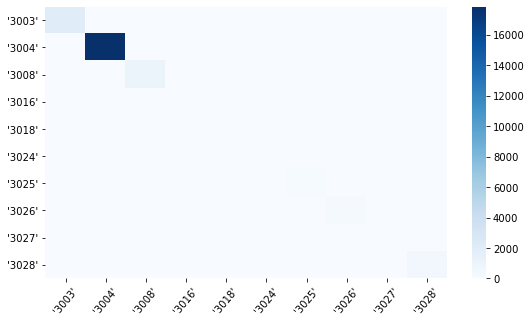

In [104]:
##i don't know if this is accurate? When I kept all the MO columns in, it looked exactly the same. When I made it for
##MO codes with just traffic types, and another heat map for severity types, it looked exactly the same too... 
##not confident enough to put this on StoryMaps even though it took us a very long time to get here
fig, ax = plt.subplots(figsize = (9,5))
sn.heatmap(mo_freq, cmap = "Blues")
plt.xticks(rotation=50)
plt.savefig("heatmap.png", dpi = 300)

In [105]:
##this is data i cleaned up/selectively trimmed on excel
pre_MO = pd.read_csv('Data/PreCovid_MO_Codes.csv') 

In [106]:
pre_MO.head(5)

MO_Code         MO_Description  Number_Of_Occurrences  Pre-COVID_Days  \
0     3003  Vehicle vs Pedestrian                   4874             442   
1     3004     Vehicle vs Vehicle                  36816             442   
2     3008        Vehicle vs Bike                   2173             442   
3     3016        Bike vs Vehicle                    222             442   
4     3018         Bike vs Other                      41             442   

   Average_Daily_Rate  
0           11.027149  
1           83.294118  
2            4.916290  
3            0.502262  
4            0.092760

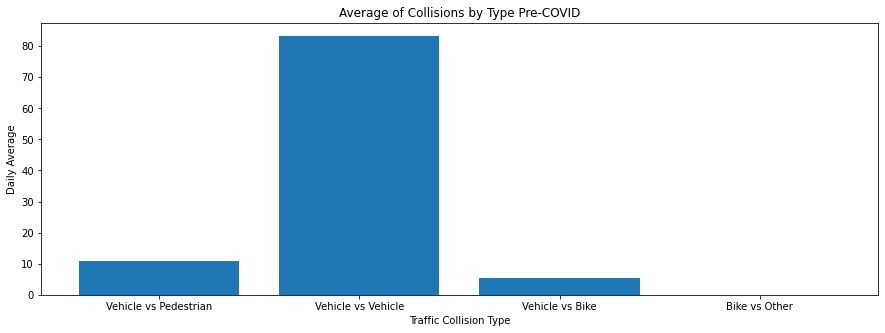

In [107]:
Traffic_Collision_Type = ['Vehicle vs Pedestrian', 'Vehicle vs Vehicle', 'Vehicle vs Bike', 'Bike vs Other']
Daily_Average = [11.02, 83.29, 5.42 , 0.093]

fig1 = plt.figure(figsize=(15,5))
plt.bar(Traffic_Collision_Type, Daily_Average)
plt.title('Average of Collisions by Type Pre-COVID')
plt.xlabel('Traffic Collision Type')
plt.ylabel('Daily Average')


fig1.show()

In [108]:
import plotly.graph_objects as go

x = ['Vehicle vs Pedestrian', 'Vehicle vs Vehicle', 'Vehicle vs Bike', 'Bike vs Other']
y = [11.03, 83.29,5.42, 0.09]

# Use the hovertext kw argument for hover text
fig1x = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['Number of Occurrences: 4874', 'Number of Occurrences: 36816', 'Number of Occurrences: 2395',
                      'Number of Occurrences: 41'])])


# Customize aspect
fig1x.update_traces(marker_color='rgb(0, 102, 204)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.9)

fig1x.update_layout(title_text='Average Daily Rates for Collision Types Pre-COVID')


fig1x.show()
fig1x.write_html("daily_collision_types_precovid.html")

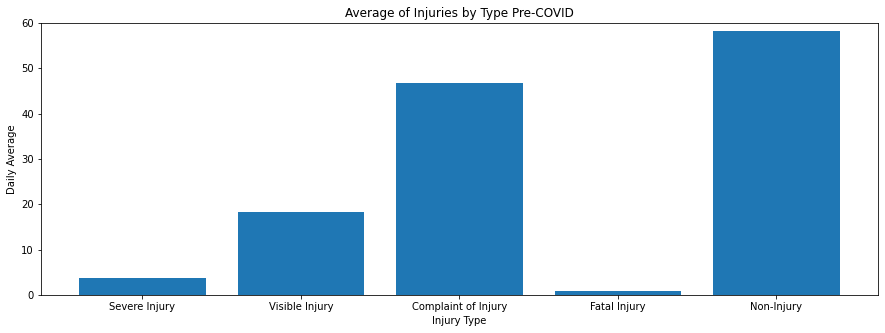

In [109]:
Injury_Type = ['Severe Injury', 'Visible Injury', 'Complaint of Injury', 'Fatal Injury', 'Non-Injury']
Average_Daily_Rate = [3.68, 18.36, 46.69, 0.74, 58.26]

fig2 = plt.figure(figsize=(15,5))
plt.bar(Injury_Type, Average_Daily_Rate)
plt.title('Average of Injuries by Type Pre-COVID')
plt.xlabel('Injury Type')
plt.ylabel('Daily Average')

axes = plt.gca()
axes.set_ylim([0,60])

fig2.show()

In [110]:
x = ['Severe Injury', 'Visible Injury', 'Complaint of Injury', 'Fatal Injury', 'Non-Injury']
y = [3.68, 18.36, 46.69, 0.74, 58.26]

# Use the hovertext kw argument for hover text
fig2x = go.Figure(data=[go.Bar(x=x, y=y,
            hovertext=['Number of Occurrences: 1628', 'Number of Occurrences: 8114', 'Number of Occurrences: 20636',
                      'Number of Occurrences: 325', 'Number of Occurrences: 25752'])])


# Customize aspect
fig2x.update_traces(marker_color='rgb(0, 102, 204)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.9)

fig2x.update_layout(title_text='Average Daily Rates for Injury Types Pre-COVID')


fig2x.show()
fig2x.write_html("daily_injury_types_precovid.html")

In [111]:
##this code is what Natalie used to input her covid #s

injury_type = ['Severe Injury', 'Visible Injury', 'Complaint of Injury', 'Fatal Injury', 'Non-Injury']

fig2xx = go.Figure(data=[
    go.Bar(name='Pre-COVID 19', x=injury_type, y=[3.68, 18.36, 46.69, 0.74, 58.26], marker_color='lightblue'),
    go.Bar(name='COVID 19', x=injury_type, y=[1, 1, 1, 1, 1], marker_color='darkblue')])
# Change the bar mode
    
fig2xx.update_layout(barmode='group')
fig2xx.show() 

In [112]:
##this code is what Natalie used to input her covid #s
collision_type = ['Vehicle vs Pedestrian', 'Vehicle vs Vehicle', 'Vehicle vs Bike', 'Bike vs Other']

fig1xx = go.Figure(data=[
    go.Bar(name='Pre-COVID 19', x=injury_type, y=[11.03, 83.29, 5.42, 0.09],   marker_color='lightblue'),
    go.Bar(name='COVID 19', x=injury_type, y=[1, 1, 1, 1], marker_color='darkblue')])
# Change the bar mode
fig1xx.update_layout(barmode='group')
fig1xx.show() 

Contribution:
* Karen: primarily worked on Pre-COVID time frame
* Natalie: primarily worked on COVID time frame

Both members collaborated and communicated on all aspects of project (including proposal, website design, website sections, comparison/analysis of both time periods together, etc).